Nama : Muhammad Reesa Rosyid

Program : Python for Data Science 

# Advanced Visualization using Python

## Word Cloud

### Definisi

Word cloud (disebut juga text cloud atau tag cloud) merupakan salah satu metode untuk menampilkan data teks secara visual. Grafik ini populer dalam text mining karena mudah dipahami. Dengan menggunakan word cloud, gambaran frekuensi kata-kata dapat ditampilkan dalam bentuk yang menarik namun tetap informatif. Semakin sering satu kata digunakan, maka semakin besar pula ukuran kata tersebut ditampilkan dalam word cloud.

### Import Library

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
import folium

### Open File

In [2]:
alice_novel = open('alice_novel.txt', 'r').read()

### Set Stopwords

In [3]:
stopwords = set(STOPWORDS)

### Inisiasi Wordcloud

In [4]:
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate wordcloud
alice_wc.generate(alice_novel)

### Show Wordcloud

(-0.5, 399.5, 199.5, -0.5)

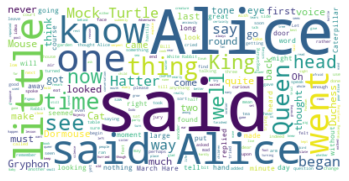

In [5]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')

### Setting Figure

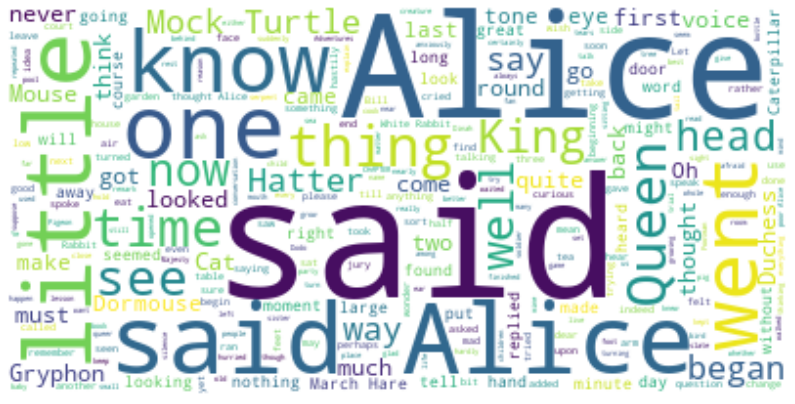

In [6]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off');

### Menghilangkan kata Said

(-0.5, 399.5, 199.5, -0.5)

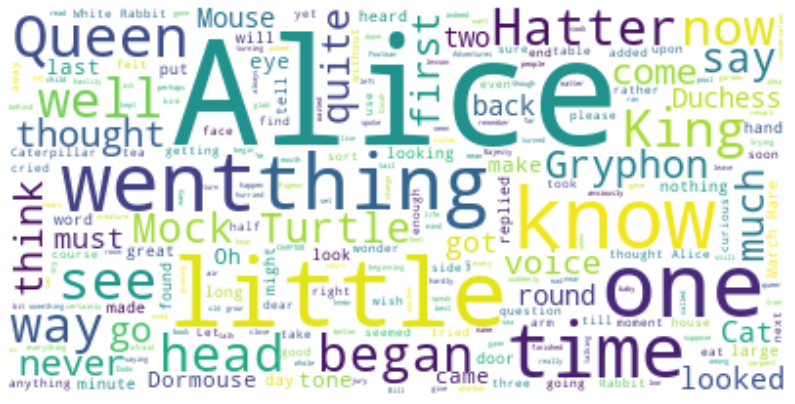

In [7]:
stopwords.add('said')
# inisiasi wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate wordcloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off')

### Masking

(-0.5, 899.5, 899.5, -0.5)

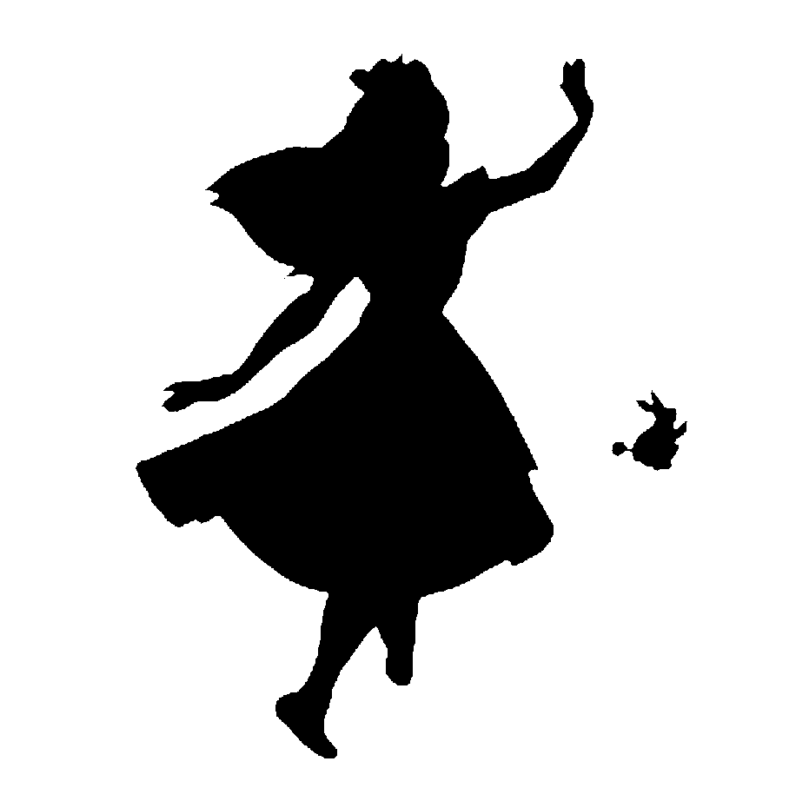

In [8]:
alice_mask = np.array(Image.open("alice_mask.png"))
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear');
plt.axis('off')

(-0.5, 899.5, 899.5, -0.5)

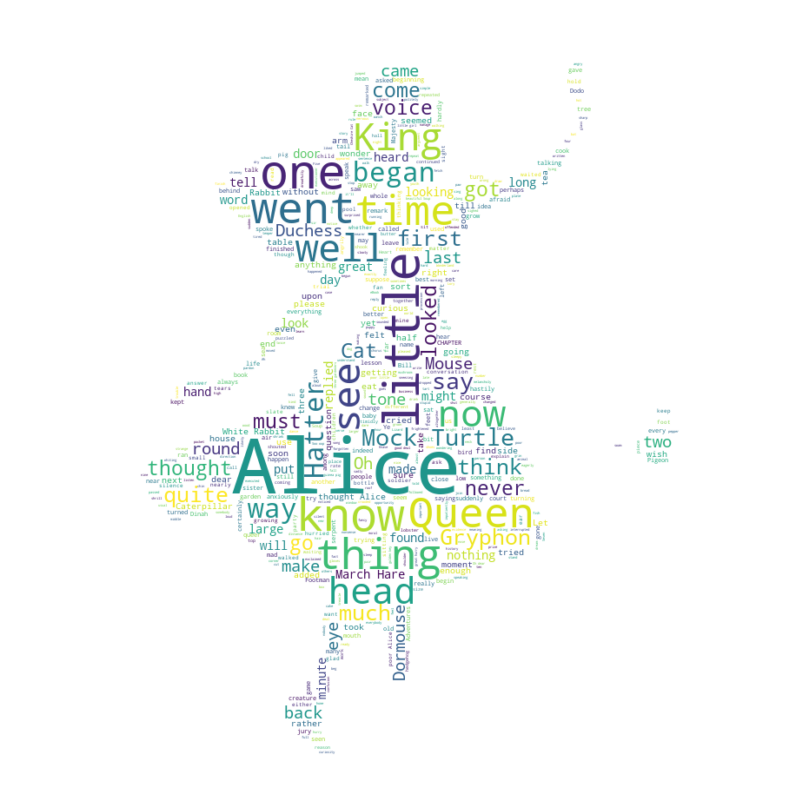

In [9]:
# inisiasi wordcloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
    mask=alice_mask
)

# generate wordcloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear');
plt.axis('off')

## Regression Plot

Plot regresi di seaborn terutama dimaksudkan untuk menambahkan panduan visual yang membantu untuk menekankan pola dalam kumpulan data selama analisis data eksplorasi. Plot regresi seperti namanya menciptakan garis regresi antara 2 parameter dan membantu memvisualisasikan hubungan liniernya.

In [10]:
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
kol = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df_can.drop(kol, axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
df_can.rename(columns={'OdName':'Country',
                       'AreaName':'Continent',
                       'RegName':'Region'}, inplace=True)

In [13]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\mrees\AppData\Local\Temp\ipykernel_22788\552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [14]:
years = np.arange(1980, 2014)
df_total = pd.DataFrame(df_can[years].sum())
df_total.index = map(float, df_total.index)
df_total.reset_index(inplace=True)
df_total.columns = ['years', 'total']
df_total.head()

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


### Plotting

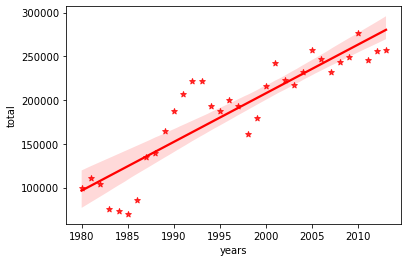

In [15]:
sns.regplot(x='years', y='total', data=df_total, color='red', marker='*');

## Folium Map

In [16]:
# definisikan world map
world_map = folium.Map()

# tampilkan
world_map

### Menentukan map berdasarkan lokasi

In [17]:
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], zoom_start=20)

world_map

In [18]:
world_map = folium.Map(location=[-6.194986754268891, 106.82303793320305], 
                       zoom_start=20,
                       tiles='Stamen Terrain')

world_map

### Membuka data

In [19]:
url = "https://github.com/ardhiraka/PFDS_sources/raw/master/Police_Department_Incidents_-_Previous_Year__2016_.csv"
df_incidents = pd.read_csv(url)
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [20]:
df_incidents.shape

(150500, 13)

In [21]:
# limit data hanya 100 teratas
limit = 100
df_incidents = df_incidents.iloc[:limit, :]
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [22]:
df_incidents.shape

(100, 13)

In [23]:
latitude = 37.77
longitude = -122.43

In [24]:
# generate san fransisco map
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

sanfran_map

### Inisiasi Fitur group